# Maximizing Revenue for Taxi  Drivers through Payment Type Analysis

## Problem Statement

In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximize revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

## Objective

This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers maximize their revenue. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

## Research Question

Is there a relationship between total fare amount and payment type, and can we nudge customers towards payment methods that generate higher revenue for drivers without negatively impacting customer experience?

## Importing libraries

In [3]:
#core libraries
import pandas as pd #for data manupilation
import numpy as np #for numerical operation
#visualization
import matplotlib.pyplot as plt #for basic plot
import seaborn as sns #for advance visualization
#statistcal ananlysis & hypothesis testing
import scipy.stats as st #for hypothesis testing
import statsmodels.api as sm  # for Q-Q plot
from scipy.stats import mannwhitneyu  # import Mann-Whitney U test
import statsmodels.formula.api as smf #for regression modeling
#surprass warnings for clean output
import warnings 
warnings.filterwarnings('ignore')

In [4]:
#loading the dataset
df = pd.read_parquet(r"C:\Users\ASUS 1\Desktop\yellow_tripdata_2023-01.parquet")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


## 📌 Exploratory Data Analysis: 

In [6]:
df.info() #overview of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [7]:
#making a column which can help in our analysis
df['Duration']= (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).dt.total_seconds()/60
df['Duration']

0           8.433333
1           6.316667
2          12.750000
3           9.616667
4          10.833333
             ...    
3066761    13.983333
3066762    19.450000
3066763    24.516667
3066764    13.000000
3066765    14.400000
Name: Duration, Length: 3066766, dtype: float64

In [8]:
#taking only those column which can helpfull in this analysis
df=df[['passenger_count','trip_distance','payment_type','fare_amount','Duration']]
df

,passenger_count,trip_distance,payment_type,fare_amount,Duration
0,1.0,0.97,2,9.30,8.433333
1,1.0,1.10,1,7.90,6.316667
2,1.0,2.51,1,14.90,12.750000
3,0.0,1.90,1,12.10,9.616667
4,1.0,1.43,1,11.40,10.833333
...,...,...,...,...,...
3066761,NaN,3.05,0,15.80,13.983333
3066762,NaN,5.80,0,22.43,19.450000
3066763,NaN,4.67,0,17.61,24.516667
3066764,NaN,3.15,0,18.15,13.000000


In [9]:
#changing the data type
df['passenger_count'] = df['passenger_count'].astype('Int64')
df['payment_type'] = df['payment_type'].astype('Int64')



In [10]:
#checking total data
df.shape

(3066766, 5)

In [11]:
#checking for null values
df.isnull().sum()


passenger_count    71743
trip_distance          0
payment_type           0
fare_amount            0
Duration               0
dtype: int64

In [12]:
null_values_percentage = df['passenger_count'].isnull().sum()/len(df)*100
print(f"percentage of null values in passenger count columns is :{null_values_percentage:.2f} %")

percentage of null values in passenger count columns is :2.34 %


In [13]:
#removing duplicates
df = df.dropna(subset=['passenger_count'])
after_removing=df.shape
print(f"after removing the null values total data left{after_removing}")


after removing the null values total data left(2995023, 5)


In [14]:
#check for duplicates value
duplicates = df.duplicated().sum()
print(f"duplicate value are:{duplicates}")
duplicates_percentage = df.duplicated().sum()/len(df)*100
print(f'Total duplicate percentage is:{duplicates_percentage:.2f} %')


duplicate value are:1191207
Total duplicate percentage is:39.77 %


In [15]:
#drop duplicate values
df.drop_duplicates(inplace=True)


In [16]:
new_shape = df.shape
print(f'after droping the duplicate values:{new_shape}')

after droping the duplicate values:(1803816, 5)


In [17]:
#let's check the contribution or distribution
# Calculate the proportions and convert to percentages with '%' sign
percentages = df['passenger_count'].value_counts(normalize=True).apply(lambda x: f'{x * 100:.2f}%')
# Display the percentages
percentages

passenger_count
1    66.34%
2    19.34%
3     5.40%
4     2.86%
5     2.28%
0     2.25%
6     1.52%
8     0.00%
7     0.00%
9     0.00%
Name: proportion, dtype: object

#### 🚖 Passenger Distribution Insights:

1-5 passengers cover 98.25% of the data → Most rides are within this range.
**6+ passengers contribute < 1% → Very rare cases, statistically insignificant.


Since they contribute so little, their impact on revenue trends is minimal.
Even if we included them, they wouldn’t change conclusions significantly.
Including them would be useful only if we were studying group ride patterns (which we aren’t).

In [19]:
payment_type = df['payment_type'].value_counts(normalize=True).apply(lambda x: f'{x*100:.2f}%')
payment_type

payment_type
1    74.70%
2    22.82%
4     1.69%
3     0.79%
Name: proportion, dtype: object

#### Payment Type:
For our analysis, we are focusing exclusively on the two primary payment methods: cash and credit card. Therefore, we have filtered the dataset to include only rides where the payment type is either cash or credit card.

In [21]:
#filtering the data 
df = df.query('passenger_count >0 & passenger_count<6')
df = df.query('payment_type<3')
after_filtering = df.shape
print(f'after filtering :{after_filtering}')

after filtering :(1692444, 5)


In [22]:
# Convert the column to string and then replace values
df['payment_type'] = df['payment_type'].astype(str).replace({'1': 'card', '2': 'cash'})
df[['payment_type']].head(5)

,payment_type
0,cash
1,card
2,card
4,card
5,card


### Statistical Summary

In [24]:
df.describe()

,passenger_count,trip_distance,fare_amount,Duration
count,1692444.0,1.692444e+06,1.692444e+06,1.692444e+06
mean,1.501945,4.876065e+00,2.420093e+01,2.054326e+01
std,0.912502,5.593026e+01,2.047816e+01,5.553706e+01
min,1.0,0.000000e+00,-4.951000e+02,-2.920000e+01
25%,1.0,1.500000e+00,1.140000e+01,9.966667e+00
50%,1.0,2.680000e+00,1.700000e+01,1.568333e+01
75%,2.0,5.600000e+00,2.890000e+01,2.345000e+01
max,5.0,6.235952e+04,1.160100e+03,1.002918e+04


Observations-

Passenger_count: Ranges from 1 to 5, which seems reasonable.

Trip_distance: Median is 2.68, 75th percentile is 5.6, but the max is 62,359.52 miles.
This indicates extreme high values that are likely errors or rare events.

Fare_amount: The median is 17.00 and the 75th percentile is 28.90, but you have a negative minimum (-495.10) and a maximum of 1160.10.
Negative fares are likely data errors, and the extremely high fare might be an outlier.

Duration: Median is 15.68 minutes and 75th percentile is 23.45 minutes, but the min is -29.20 and the max is over 10,000 minutes.
Negative durations are clearly erroneous, and the extremely high duration values need further investigation.

In [85]:
# Dropping negative values
df = df.query('fare_amount > 0 & Duration > 0 & trip_distance > 0')

# Set pandas display options to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the descriptive statistics
print(df.describe())

       passenger_count  trip_distance  fare_amount   Duration
count       1396856.00     1396856.00   1396856.00 1396856.00
mean              1.52           2.89        16.98      14.52
std               0.93           2.13         8.27       7.04
min               1.00           0.01         0.01       0.02
25%               1.00           1.37        10.70       9.12
50%               1.00           2.28        15.60      13.87
75%               2.00           3.71        21.20      19.22
max               5.00          11.90        41.00      34.97


### Checking outliers

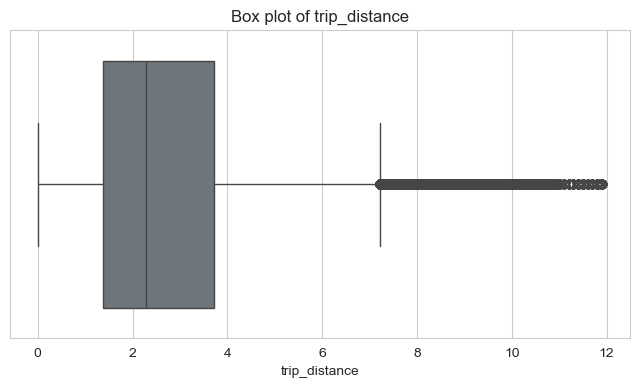

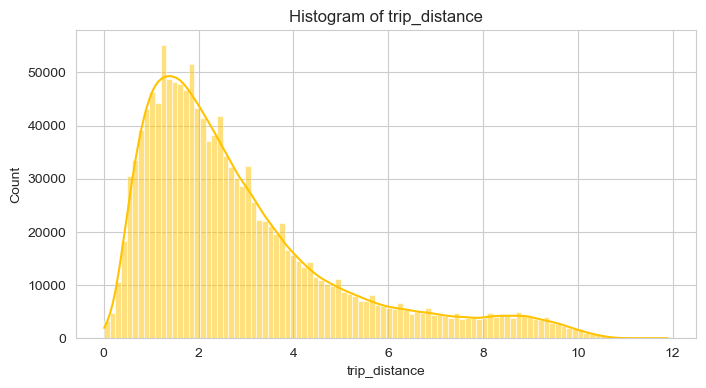

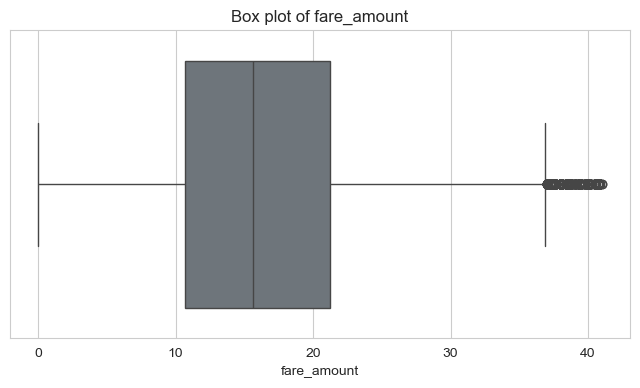

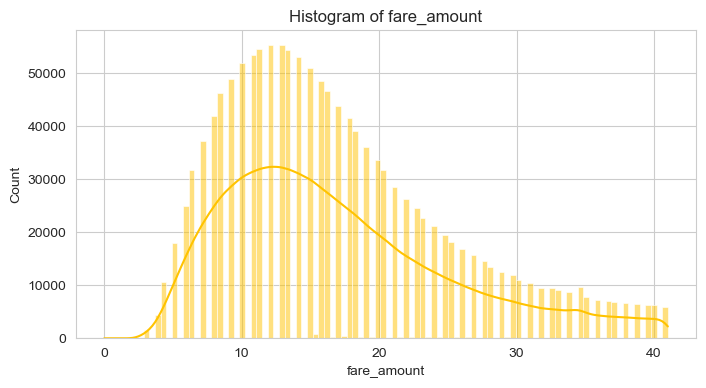

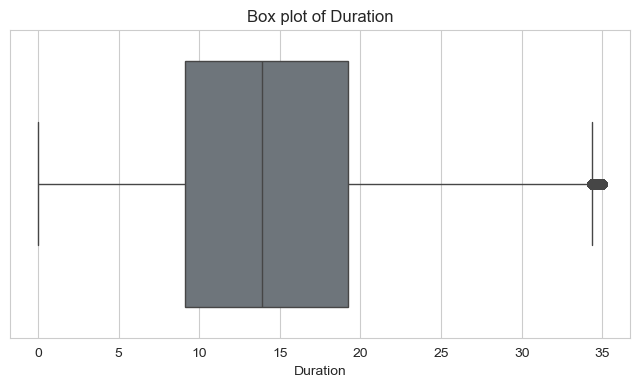

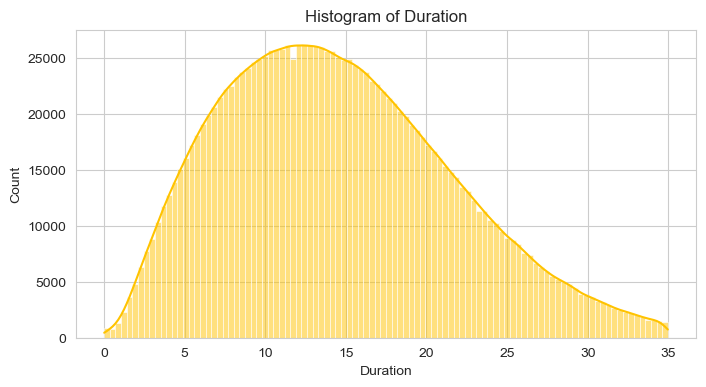

In [89]:
# List of columns to visualize
cols = ['trip_distance', 'fare_amount', 'Duration']

# Theme colors
box_color = "#6C757D"
hist_color = "#FFC300"

# Using boxplot
for col in cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color=box_color)
    plt.title(f'Box plot of {col}')
    plt.show()

    # Using histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=100, kde=True, color=hist_color)
    plt.title(f'Histogram of {col}')
    plt.show()

After plotting both boxplots and histograms for the trip_distance, fare_amount, and Duration columns, I observed that each variable contains a significant number of extreme values (outliers). These outliers cause heavy right-skew in the distributions, making it difficult to visualize the main cluster of data.

Next Step:
I will proceed with a systematic approach (e.g., IQR method) to remove or cap these extreme values so that my analysis and statistical tests are not overly influenced by a relatively small number of anomalous points. By handling these outliers, I aim to improve the reliability of the insights drawn from the data.

### Removing outliers


In [90]:
#using IQR method
cols = ['trip_distance', 'fare_amount', 'Duration']
for col in cols:
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    df = df.query(f"{col} >= @lower_bound and {col} <= @upper_bound")
    


In [91]:
df

,passenger_count,trip_distance,payment_type,fare_amount,Duration
0,1,0.97,cash,9.30,8.43
1,1,1.10,card,7.90,6.32
2,1,2.51,card,14.90,12.75
4,1,1.43,card,11.40,10.83
5,1,1.84,card,12.80,12.30
...,...,...,...,...,...
2995013,1,6.82,cash,31.00,21.95
2995014,2,1.74,card,11.40,9.97
2995015,1,2.84,card,13.50,7.75
2995019,1,3.37,card,15.60,10.87


## Feature Analysis: Understanding Fare Amount,Passenger Count & Trip Distance by Payment Type

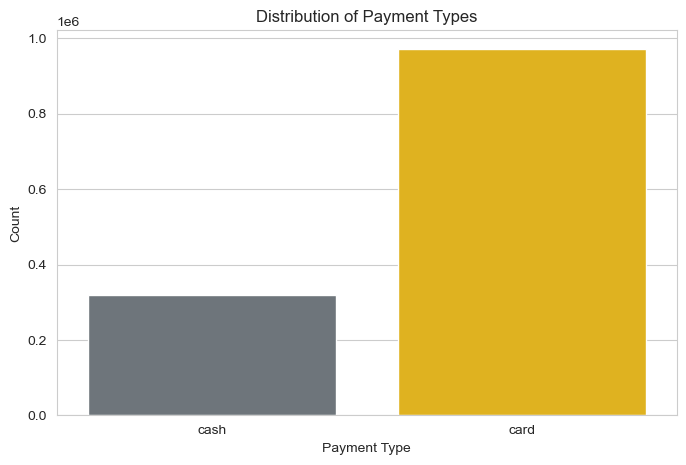

In [95]:
# Set a consistent color theme
custom_palette = {"cash": "#6C757D", "card":  "#FFC300"}  # Light peach for cash, deep red for card
plt.figure(figsize=(8, 5))
#using countplot
sns.countplot(x=df['payment_type'], palette=custom_palette)
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()


### 🔍 Observations from the Countplot:
Card payments are significantly higher than cash payments.
 passengers might prefer card payments due to convenience and speed.

In [ ]:


plt.figure(figsize=(12, 5))

# Subplot 1: Distribution of fare amount
plt.subplot(1, 2, 1)
plt.title('Distribution of Fare Amount')
plt.hist(df[df['payment_type'] == 'card']['fare_amount'],
         histtype='barstacked', bins=20, edgecolor='k',
         color=custom_palette['card'], label='Card')
plt.hist(df[df['payment_type'] == 'cash']['fare_amount'],
         histtype='barstacked', bins=20, edgecolor='k',
         color=custom_palette['cash'], label='Cash')
plt.legend()

# Subplot 2: Distribution of trip distance
plt.subplot(1, 2, 2)
plt.title('Distribution of Trip Distance')
plt.hist(df[df['payment_type'] == 'card']['trip_distance'],
         histtype='barstacked', bins=20, edgecolor='k',
         color=custom_palette['card'], label='Card')
plt.hist(df[df['payment_type'] == 'cash']['trip_distance'],
         histtype='barstacked', bins=20, edgecolor='k',
         color=custom_palette['cash'], label='Cash')
plt.legend()

plt.tight_layout()  # Improves subplot spacing
plt.show()


🔍Observations
Card vs. Cash
The yellow bars (Card) generally dominate at higher fare amounts, suggesting card payments might be more common for pricier trips.
The gray bars (Cash) peak somewhat lower but still overlap significantly.

Skewed Distribution
Even after outlier removal, fares can remain right‐skewed—some longer, costlier trips are valid.

Multiple Peaks
The distribution looks somewhat “multi‐modal” (multiple small peaks). This might reflect different rate zones or typical trip patterns (e.g., short local rides vs. airport trips).


In [ ]:
#using stack bar chart we are analyzing passenger count and payment type
# 1) Count how many rides belong to each (payment_type, passenger_count)
df_group = df.groupby(['payment_type', 'passenger_count']).size().reset_index(name='count')

# 2) Also find how many rides belong to each payment_type overall
df_payment = df_group.groupby('payment_type')['count'].sum().reset_index(name='payment_count')

# 3) Calculate total rides
total_rides = df_payment['payment_count'].sum()

# 4) Merge data so each row has both:
#    - passenger_count
#    - payment_type
#    - count (rides in that group)
#    - payment_count (total rides for that payment type)
df_merged = pd.merge(df_group, df_payment, on='payment_type')

# 5) Calculate proportion_of_total for each segment (passenger_count within payment_type)
#    relative to the ENTIRE dataset
df_merged['prop_of_total'] = df_merged['count'] / total_rides

# 6) Pivot so rows = payment_type, columns = passenger_count, values = prop_of_total
df_pivot = df_merged.pivot(index='payment_type', columns='passenger_count', values='prop_of_total').fillna(0)

# 7) Sort passenger_count columns if needed
#    (e.g., passenger_count from 1 to 5)
df_pivot = df_pivot[sorted(df_pivot.columns)]

# 8) We'll plot two horizontal bars (one for each payment_type),
#    each subdivided by passenger_count, summing to the proportion_of_total
#    for that payment type.
fig, ax = plt.subplots(figsize=(10, 5))

# We'll track the left edge of each segment
y_positions = [0, 1]  # top bar = 0, bottom bar = 1
bar_height = 0.6

# Define a custom palette for passenger_count (5 categories)
passenger_colors = ["#FFD400", "#FFB800", "#FFA600", "#FF8F00", "#FF7700"]

# We'll plot from left to right. Each row is a bar: "cash" or "card"
payment_types = df_pivot.index.tolist()

for i, ptype in enumerate(payment_types):
    # This row is a Series with passenger_count=1..5 proportions
    row_data = df_pivot.loc[ptype]
    left_edge = 0.0
    
    for j, (pcount, val) in enumerate(row_data.items()):
        if val > 0:
            # Plot a rectangle from left_edge to left_edge+val
            ax.barh(
                y=y_positions[i],
                width=val,
                left=left_edge,
                height=bar_height,
                color=passenger_colors[j % len(passenger_colors)],
                edgecolor='white'
            )
            
            # Add percentage label if segment > 1%
            if val > 0.01:
                ax.text(
                    left_edge + val/2,
                    y_positions[i],
                    f"{val*100:.0f}%",
                    ha='center', va='center', color='black', fontsize=9
                )
            
            left_edge += val
    
    # Also label the entire bar with the total proportion for that payment_type
    # sum of row_data is proportion_of_dataset for that payment_type
    total_prop = row_data.sum()
    ax.text(
        total_prop + 0.01,  # place text slightly to the right
        y_positions[i],
        f"{(total_prop*100):.0f}%", 
        ha='left', va='center', color='black', fontsize=10, fontweight='bold'
    )

# Format y-axis ticks with the payment_type labels
ax.set_yticks(y_positions)
ax.set_yticklabels(payment_types, fontsize=11)

ax.set_xlim(0, 1)  # 0% to 100%
ax.set_ylim(-0.5, 1.5)

ax.set_xlabel("Proportion of Entire Dataset", fontsize=11)
ax.set_ylabel("Payment Type", fontsize=11)
ax.set_title("Payment Type vs. Passenger Count as Proportions of Entire Dataset", fontsize=13)

# Create a custom legend for passenger_count
# (just show squares for 1..5)
handles = []
labels = []
for idx, col in enumerate(df_pivot.columns):
    patch = plt.Rectangle((0, 0), 1, 1, color=passenger_colors[idx], edgecolor='white')
    handles.append(patch)
    labels.append(str(col))

legend = ax.legend(handles, labels, title="Passenger Count", bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()
#"To visualize this data, I started by grouping the data to count rides based on payment_type and passenger_count. Then, 
#I calculated the proportion of each group relative to the total dataset. Using plt.barh(), I plotted horizontal bars for each payment type, 
#where each segment represented a different passenger count. I added labels directly on the chart to enhance readability, 
#ensuring clear insights for stakeholders."


🔍Observations
Overall Dataset Distribution

Card payments represent about 76% of all rides, while cash payments make up the remaining 24%.
This indicates that card usage dominates in the dataset.
Passenger Count Breakdown

For card rides:
51% of the entire dataset consists of single-passenger trips paid by card.
The remaining 25% (within card) are multi-passenger trips of 2 or more people.
For cash rides:
17% of the entire dataset are single-passenger cash rides.
The remaining 7% are multi-passenger cash rides.
Single-Passenger Dominance

Combining both payment types, single-passenger trips constitute the majority of rides (over two-thirds of the dataset).
Multi-passenger trips (2–5) form a smaller fraction overall, regardless of payment method.
Practical Takeaway

Taxis see a high reliance on card payments, especially for single-passenger rides.
Cash transactions remain relevant, but they represent a smaller share, mostly single-passenger as well.
This distribution highlights the convenience preference (card) and the rarity of larger group rides.


## Hypotheses Testing

### Objective:
### To test whether there is a statistically significant difference in fare amounts between rides paid by card and rides paid by cash.

### Null Hypothesis: The mean fare is the same for both payment types (card vs. cash).

### Alternative Hypothesis: The mean fare differs between the two payment types.

In [ ]:

# 1. Seaborn style for a clean background
sns.set_style("whitegrid")

# 2. Create the Q-Q plot figure
fig = sm.qqplot(df['fare_amount'], line='45')

# 3. Customize the plot
ax = fig.axes[0]

# The Q-Q plot typically has two line objects:
#   - line[0]: the data points
#   - line[1]: the 45° reference line
# Depending on statsmodels version, the data might be a scatter object.

# Try to color the data points in a taxi-yellow
points = ax.get_lines()[0]
points.set_markerfacecolor("#FFC300")  # bright taxi yellow
points.set_markeredgecolor("#FFC300")

# Optionally, change the reference line color to black or red
ref_line = ax.get_lines()[1]
ref_line.set_color("red")
ref_line.set_linewidth(1.5)

# 4. Add a title & labels
ax.set_title("Q-Q Plot of Fare Amount (Taxi-Themed)", fontsize=14)
ax.set_xlabel("Theoretical Quantiles", fontsize=12)
ax.set_ylabel("Sample Quantiles", fontsize=12)

plt.tight_layout()
plt.show()



Q-Q Plot Purpose: Provides a formal visual check of normality beyond histograms.
Points near the line suggest normality; large deviations (particularly in tails) indicate skewness or heavy tails.

Statistical Test Recommendation:
Since fare_amount is skewed and not normal, a two-sample t-test is not ideal (unless I log-transform this data).
A nonparametric test like Mann–Whitney U (also known as Wilcoxon rank-sum) is more appropriate for comparing fare amounts between two groups (e.g., card vs. cash).

### Methodology
Since our fare data is highly skewed (as confirmed by our histograms and Q-Q plots), we opted for a nonparametric test. We used the Mann–Whitney U test because:

 It does not assume normality.
 It is appropriate for comparing two independent groups (card vs. cash).

In [ ]:
# 1. Extract fare data for each payment type
card_fares = df.loc[df['payment_type'] == 'card', 'fare_amount'].dropna()
cash_fares = df.loc[df['payment_type'] == 'cash', 'fare_amount'].dropna()

# 2. Perform Mann–Whitney U test (two-sided)
stat, p_value = mannwhitneyu(card_fares, cash_fares, alternative='two-sided')

# 3. Significance level
alpha = 0.05

print("Mann–Whitney U Statistic:", stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject H0: There's a significant difference in the fare amounts between card & cash.")
else:
    print("Fail to reject H0: No significant difference in fare amounts.")


#### Additionally, I computed the median fare for each group to understand the direction of any difference:

In [ ]:
median_card = card_fares.median()
median_cash = cash_fares.median()

print(f"Median Fare (Card): {median_card:.2f}")
print(f"Median Fare (Cash): {median_cash:.2f}")


#### Based on the results:
median_card > median_cash: It suggests that rides paid by card tend to have higher fares.



## Regression Analysis: Modeling Fare Amount Based on Trip Duration and Payment Type



In [ ]:
# linear regression formula: 
model = smf.ols("fare_amount ~ Duration + C(payment_type)", data=df).fit()
print(model.summary())




# Conclusion & Recommendatins

## Limitations & Suggestions
- **Residual Non-Normality:**  
  The Q-Q plot indicates that the residuals from our regression model are **not normally distributed**. In future analyses, consider applying a **log-transformation** to `fare_amount` or using **robust regression** techniques to better handle the skewed data.
  
- **Additional Predictors:**  
  While the current model includes **Duration** and **Payment Type**, incorporating further predictors—such as **trip_distance**, **time-of-day**, or **passenger_count**—could refine the model and provide deeper insights into the factors influencing fare amounts.

## Regression Analysis Findings
- **Trip Duration Impact:**  
  Each additional minute increases fare by approximately **\$0.86**.
  
- **Payment Type Impact:**  
  Controlling for duration, rides paid by cash are on average about **\$0.25 cheaper** than those paid by card. This means that for trips of equal duration, **cash 
  
##  What Does "Controlling for Duration" Mean?
It means that when comparing two trips of equal duration, the trip paid by cash is estimated to be $0.28 cheaper than the one paid by card. This is an average effect found by the model, not a direct measurement of frequency. So even if cash rides have a lower fare on average, if card rides occur much more frequently (which your univariate analyses indicate), then overall revenue might still be driven by card transactions.rides** cost less.
  
- **Model Performance:**  
  The model explains **78.3%** of the variance in `fare_amount` (R-squared = 0.783), indicating a strong model fit.

## Hypothesis Testing Results
- Our **Mann–Whitney U test** showed a statistically significant difference in fare amounts between card and cash payments, confirming that the observed difference is unlikely due to chance.

## Recommendations
- **Incentivize Card Payments:**  
  Promote cashless transactions through loyalty programs, targeted promotions, or small discounts on digital payments, as card payments are associated with higher fares.
  
- **Further Analyze Ride Characteristics:**  
  Investigate additional variables (e.g., **trip_distance**, **time-of-day**, **passenger_count**) to understand if card rides are linked to longer trips or occur during peak times, which might explain the higher fares.
  
- **Invest in Digital Infrastructure:**  
  Enhance digital transaction systems to improve operational efficiency and customer satisfaction, leading to long-term revenue growth.

## Summary
Both our hypothesis testing and regression analysis support a strategy of **promoting card payments** to boost revenue. Despite some limitations (like non-normal residuals), our findings indicate that card rides yield higher fares. This targeted approach, combined with further exploration of ride characteristics and additional predictors, can help optimize pricing and sny additional insights from your project!